In [19]:
import pandas as pd


df = pd.read_csv(r'C:\Users\sadiv\Documents\DataAnalytics\LasVegasTripAdvisorReviews.csv', sep=";")
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [20]:
df.size

10080

In [72]:
df.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [27]:
df.info

<bound method DataFrame.info of     User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0            USA           11                  4             13      5   
1            USA          119                 21             75      3   
2            USA           36                  9             25      5   
3             UK           14                  7             14      4   
4         Canada            5                  5              2      4   
5         Canada           31                  8             27      3   
6             UK           45                 12             46      4   
7            USA            2                  1              4      4   
8          India           24                  3              8      4   
9         Canada           12                  7             11      3   
10           USA          102                 24             58      2   
11     Australia           20                  9             24      3   
12    

In [21]:
import psycopg2
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb
from pandas.plotting import scatter_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)

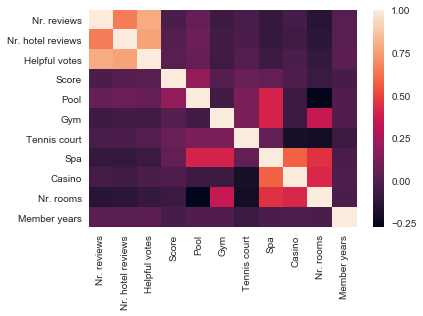

In [74]:
#plt.subplots(figsize = (30,30))
sns.heatmap(aa.corr())

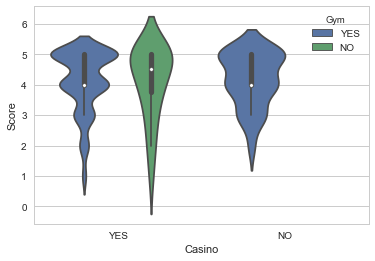

In [39]:
sns.set(style="whitegrid")
sns.violinplot(x="Casino", y="Score", hue="Gym" data=df, figsize = (15,15))

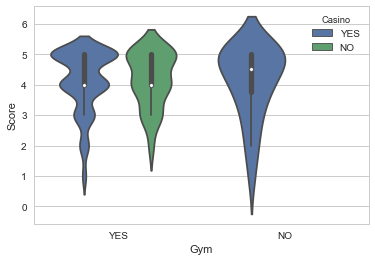

In [79]:
sns.set(style="whitegrid")
sns.violinplot(x="Gym", y="Score", hue="Casino", data=df, figsize = (15,15))

In [76]:
features = ['Casino', 'Gym', 'Tennis court', 'Spa', 'Pool']
target = ['Score']

y = df[target]
X = df[features]

In [73]:
aa = df.replace({'Pool': {'YES': 1, 'NO': 0}, 'Gym': {'YES': 1, 'NO': 0}, 'Tennis court': {'YES': 1, 'NO': 0}, 'Spa': {'YES': 1, 'NO': 0}, 'Casino': {'YES': 1, 'NO': 0}, 'Gym': {'YES': 1, 'NO': 0}})

In [84]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = aa[target]
X = aa[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4473684210526316


Text(0.5,1,'Comparison of different Feature Importances')

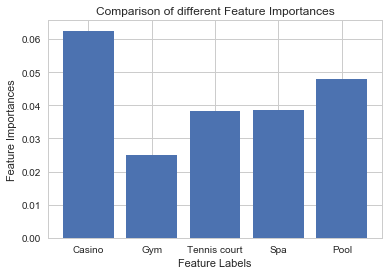

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 50) 
extra_tree_forest.fit(X, y.values.ravel()) 
feature_importance = extra_tree_forest.feature_importances_ 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')